In [1]:
import numpy as np

from scipy import (special, signal, ndimage)
from scipy.special import sph_harm

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs

plt.rcParams['figure.figsize'] = (25, 10)

import os

from box import Box, R_earth
from plotting import (plot_plate_carree, plot_orthographic_np, plot_mollweide)
from units import unit

N = 512
box = Box.generate(N)

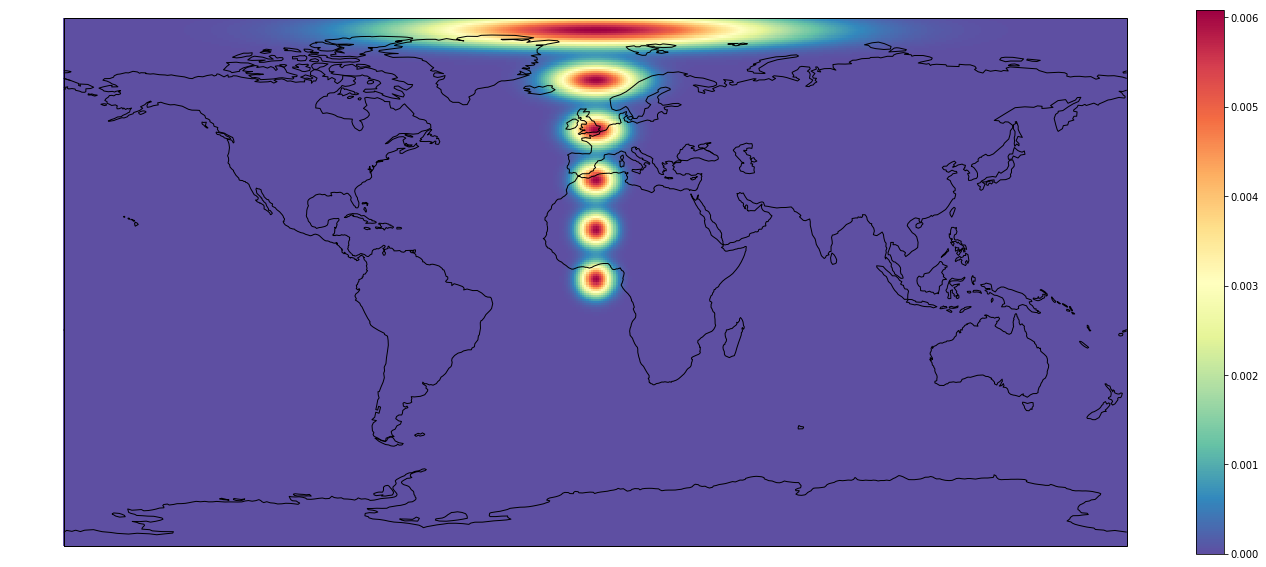

In [2]:
test_data = np.zeros(shape=box.shape)
idx = np.linspace(N//4, N//2-8, num=6, dtype='int')
test_data[idx, np.zeros_like(idx)] = 1./np.cos(box.lat[idx] * np.pi / 180.0)

smoothed_test = box.gaussian_filter(test_data, [400*unit.km, 400*unit.km])
plot_plate_carree(box, smoothed_test, cmap='Spectral_r')

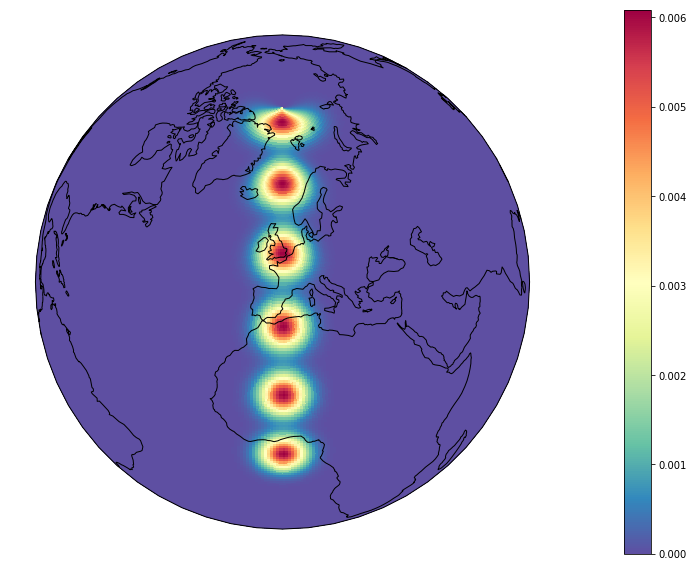

In [3]:
plot_orthographic_np(
        box, smoothed_test,
        central_latitude=45, cmap='Spectral_r')

In [4]:
smoothed_test[idx, 0].std()

5.324377010099454e-08

In [5]:
test_data = np.zeros(box.shape)
lon_rad = box.lon / 180. * np.pi
lat_rad = (box.lat + 90) / 180. * np.pi

l = 3
m = 2

x = sph_harm(m, l, lon_rad[None,:], lat_rad[:,None])
test_data[:] = x.real

diff0 = (sph_harm(m, l, lon_rad[None,:], lat_rad[:,None]+0.001).real
        - sph_harm(m, l, lon_rad[None,:], lat_rad[:,None]-0.001).real)/0.002
diff1 = (sph_harm(m, l, lon_rad[None,:]+0.001, lat_rad[:,None]).real
        - sph_harm(m, l, lon_rad[None,:]-0.001, lat_rad[:,None]).real)/(0.002 * np.sin(lat_rad)[:,None])

max error 0: 3.94273577113e-05
mean error 0: 1.75850132535e-07
max error 1: 0.000353317948691
mean error 1: 1.75420531743e-06


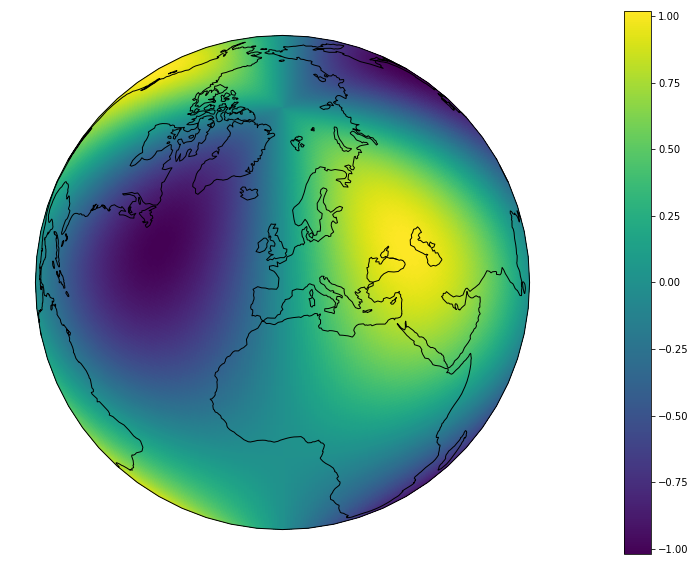

In [6]:
test_sobel = box.sobel_filter(test_data)
test_sobel[2] *= (2*np.pi) / N
print("max error 0:", ((test_sobel[0]/test_sobel[2] - diff0)**2).max())
print("mean error 0:", ((test_sobel[0]/test_sobel[2] - diff0)**2).mean())
print("max error 1:", ((test_sobel[1]/test_sobel[2] - diff1)**2).max())
print("mean error 1:", ((test_sobel[1]/test_sobel[2] - diff1)**2).mean())

plot_orthographic_np(box, test_sobel[1]/test_sobel[2], central_latitude=45)